# Detection of Spam in Email

The first dataset is one produced for detecting Spam emails from the Enron public email corpus.
In addition to some small numbers of Spam already in the corpus, additional spam emails were
introduced into each user’s email stream to have enough spam examples to train a classifier. The
non-Spam emails are labeled “ham”. (See this paper for details:
http://www.aueb.gr/users/ion/docs/ceas2006_paper.pdf ) The dataset that we have was gleaned
from their web site at http://www.aueb.gr/users/ion/data/enron-spam/.
Although there are 3 large directories of both Spam and Ham emails, only the first one is used

In [4]:
!pip install matplotlib==3.7.1 seaborn==0.13.1 wordcloud==1.9.2 numpy==1.24.3

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Defines a function to read email files from specified ham and spam directories.


Tokenizes the email text using NLTK and stores it with its label (spam/ham).


Shuffles the data and prints sample tokenized emails.

In [6]:
import os
import random
import nltk
nltk.download('punkt')  # for tokenization
nltk.download('punkt_tab')  # for tokenization
from nltk.corpus import stopwords

# Define the function from classifySPAM.py
def processspamham(dirPath, limitStr):
    limit = int(limitStr)
    hamtexts = []
    spamtexts = []

    # Set the working directory
    os.chdir(dirPath)

    for file in os.listdir("./spam"):
        if file.endswith(".txt") and len(spamtexts) < limit:
            with open(f"./spam/{file}", 'r', encoding="latin-1") as f:
                spamtexts.append(f.read())

    for file in os.listdir("./ham"):
        if file.endswith(".txt") and len(hamtexts) < limit:
            with open(f"./ham/{file}", 'r', encoding="latin-1") as f:
                hamtexts.append(f.read())

    print("Number of spam files:", len(spamtexts))
    print("Number of ham files:", len(hamtexts))

    emaildocs = []
    for spam in spamtexts:
        tokens = nltk.word_tokenize(spam)
        emaildocs.append((tokens, 'spam'))

    for ham in hamtexts:
        tokens = nltk.word_tokenize(ham)
        emaildocs.append((tokens, 'ham'))

    random.shuffle(emaildocs)

    print("\nSample tokenized emails:\n")
    for email in emaildocs[:4]:
        print(email)
        print()

    return emaildocs


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [7]:
corpus_path = '/content/drive/MyDrive/SPRING_2025/NLP/FINAL_PROJ_DATA/EmailSpamCorpora/corpus'


In [8]:
emaildocs = processspamham(corpus_path, str(100))


Number of spam files: 100
Number of ham files: 100

Sample tokenized emails:

(['Subject', ':', 'hpl', 'nom', 'for', 'march', '21', ',', '2001', '(', 'see', 'attached', 'file', ':', 'hplno', '321', '.', 'xls', ')', '-', 'hplno', '321', '.', 'xls'], 'ham')

(['Subject', ':', 'hpl', 'nom', 'for', 'sept', '.', '22', ',', '2000', '(', 'see', 'attached', 'file', ':', 'hplo', '922', '.', 'xls', ')', '-', 'hplo', '922', '.', 'xls'], 'ham')

(['Subject', ':', 'oto', 'i', 'will', 'be', 'out', 'of', 'the', 'office', 'from', '3', '/', '15', 'thru', '3', '/', '25', 'on', 'vacation', '.', 'if', 'you', 'have', 'any', 'questions', 'mike', 'olsen', 'ext', '-', '35796', 'will', 'be', 'the', 'point', 'person', '.', 'my', 'desk', 'will', 'be', 'handle', 'by', ':', 'bob', 'c', '.', '3', '-', '6101', 'bmar', 'create', 'and', 'send', 'noms', 'bridge', 'back', '-', 'hpl', '/', 'hpl', '&', 'ena', 'mike', '3', '-', '5796', 'carhtage', 'hub', 'devon', 'bmar', '(', 'back', 'up', ')', 'hpl', 'pools', 'bp', '-', '

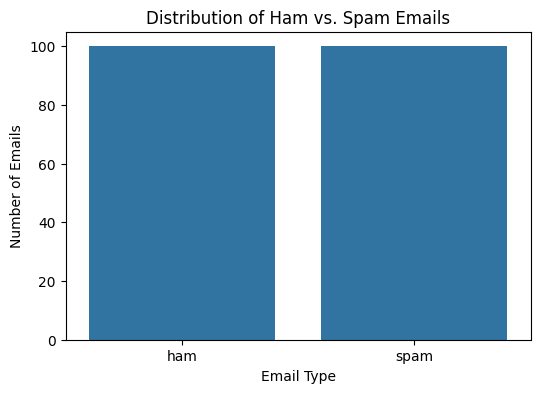

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count the number of ham and spam emails
label_counts = {}
for tokens, label in emaildocs:
    label_counts[label] = label_counts.get(label, 0) + 1

# Create a bar plot
plt.figure(figsize=(6, 4))
sns.barplot(x=list(label_counts.keys()), y=list(label_counts.values()))
plt.title('Distribution of Ham vs. Spam Emails')
plt.xlabel('Email Type')
plt.ylabel('Number of Emails')
plt.show()

Defines a function to preprocess tokenized emails by lowercasing, removing punctuation,
and optionally removing stopwords.


Applies this preprocessing to the email data, creating versions with and without stopwords removed.

Prints sample processed emails for both cases.

In [10]:
import string
nltk.download('stopwords')

def preprocess_email(tokens, remove_stopwords=True):
    """
    Preprocesses a list of tokens by lowercasing, removing punctuation,
    and optionally removing stopwords.
    """
    # Lowercase and remove punctuation
    processed_tokens = [token.lower() for token in tokens if token not in string.punctuation]

    if remove_stopwords:
        stopwords_english = stopwords.words('english')
        processed_tokens = [token for token in processed_tokens if token not in stopwords_english]

    return processed_tokens

# Apply preprocessing to your emaildocs
processed_emaildocs = []
for tokens, label in emaildocs:
    processed_tokens = preprocess_email(tokens, remove_stopwords=True) # Set to False to keep stopwords
    processed_emaildocs.append((processed_tokens, label))

print("\nSample processed emails (with stopwords and punctuation removed):\n")
for email in processed_emaildocs[:4]:
    print(email)
    print()

processed_emaildocs_with_stopwords = []
for tokens, label in emaildocs:
    processed_tokens = preprocess_email(tokens, remove_stopwords=False)
    processed_emaildocs_with_stopwords.append((processed_tokens, label))

print("\nSample processed emails (without stopwords and punctuation removed):\n")
for email in processed_emaildocs_with_stopwords[:4]:
    print(email)
    print()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.



Sample processed emails (with stopwords and punctuation removed):

(['subject', 'hpl', 'nom', 'march', '21', '2001', 'see', 'attached', 'file', 'hplno', '321', 'xls', 'hplno', '321', 'xls'], 'ham')

(['subject', 'hpl', 'nom', 'sept', '22', '2000', 'see', 'attached', 'file', 'hplo', '922', 'xls', 'hplo', '922', 'xls'], 'ham')

(['subject', 'oto', 'office', '3', '15', 'thru', '3', '25', 'vacation', 'questions', 'mike', 'olsen', 'ext', '35796', 'point', 'person', 'desk', 'handle', 'bob', 'c', '3', '6101', 'bmar', 'create', 'send', 'noms', 'bridge', 'back', 'hpl', 'hpl', 'ena', 'mike', '3', '5796', 'carhtage', 'hub', 'devon', 'bmar', 'back', 'hpl', 'pools', 'bp', 'amoco', 'centana', 'storage', 'hpl', 'meter', '7001', 'tom', '3', '6224', 'tufco', 'path', 'hpl', 'ena'], 'ham')

(['subject', 'paln', 'killing', 'los', 'angeles', 'l', 'observer', 'notes', 'pertaining', 'health', 'c', 'e', 'l', 'e', 'b', 'r', 'e', 'x', '2', 'oo', 'gg', '30', 'pllis', '145', 'oo', '6', 'piils', '299', '95', '90'

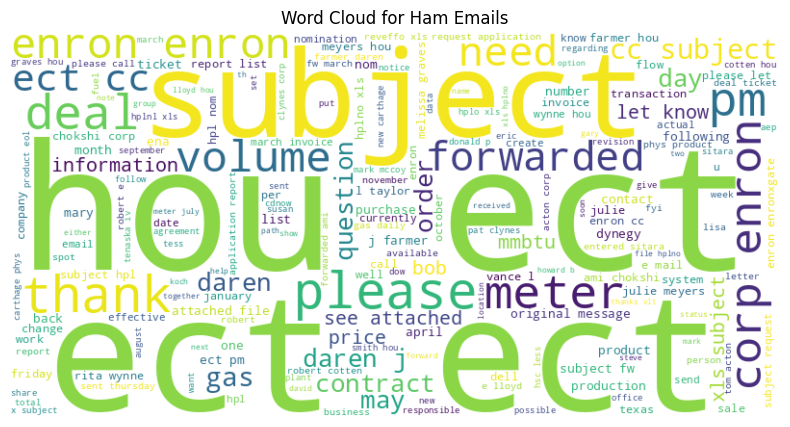

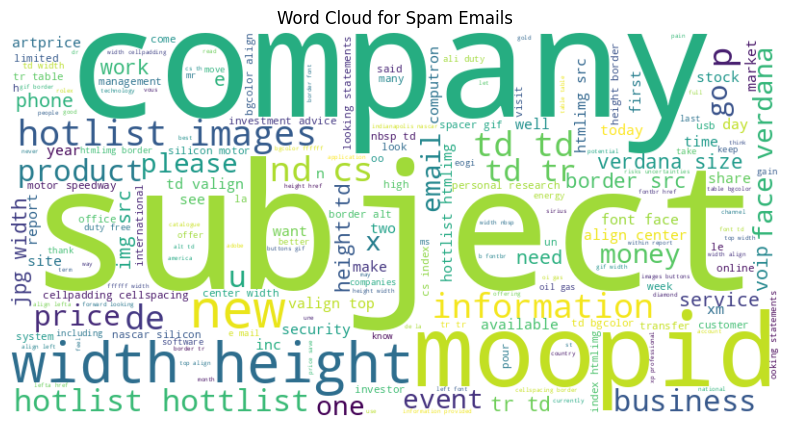

In [11]:
from wordcloud import WordCloud

# Separate tokens for ham and spam
ham_tokens = []
spam_tokens = []
for tokens, label in processed_emaildocs:
    if label == 'ham':
        ham_tokens.extend(tokens)
    else:
        spam_tokens.extend(tokens)

# Generate Word Cloud for Ham
ham_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(ham_tokens))

plt.figure(figsize=(10, 5))
plt.imshow(ham_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Ham Emails')
plt.show()

# Generate Word Cloud for Spam
spam_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(spam_tokens))

plt.figure(figsize=(10, 5))
plt.imshow(spam_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Spam Emails')
plt.show()

Defines a function to get the most frequent words (unigrams) from a word list.


Defines a function to create a bag-of-words feature dictionary for a document
based on the presence of the most frequent words.

In [12]:
from nltk.probability import FreqDist

def get_word_features(wordlist, num_features):
    """
    Creates a list of the most frequent words.
    """
    wordlist = FreqDist(wordlist)
    word_features = [word for word, freq in wordlist.most_common(num_features)]
    return word_features

# Get all words from the processed documents to determine the most frequent
all_words = []
for tokens, label in processed_emaildocs:
    all_words.extend(tokens)

num_features = 2000
word_features = get_word_features(all_words, num_features)

def document_features(document):
    """
    Creates a feature dictionary for a document based on word_features.
    """
    document_words = set(document)
    features = {}
    for word in word_features:
        features['contains({})'.format(word)] = (word in document_words)
    return features

# Create feature sets for all documents
feature_sets = [(document_features(d), c) for (d, c) in processed_emaildocs]

print("\nSample feature sets:\n")
for feature_set in feature_sets[:4]:
    print(feature_set)
    print()


Sample feature sets:

({'contains(ect)': False, 'contains(subject)': True, 'contains(hou)': False, 'contains(enron)': False, 'contains(com)': False, 'contains(2)': False, 'contains(http)': False, 'contains(0)': False, 'contains(1)': False, 'contains(please)': False, 'contains(2000)': False, 'contains(td)': False, 'contains(3)': False, 'contains(www)': False, 'contains(company)': False, 'contains(10)': False, 'contains(width)': False, 'contains(information)': False, 'contains(e)': False, 'contains(cc)': False, 'contains(pm)': False, 'contains(price)': False, 'contains(corp)': False, 'contains(09)': False, 'contains(gas)': False, 'contains(may)': False, 'contains(moopid)': False, 'contains(hotlist)': False, 'contains(2001)': True, 'contains(00)': False, 'contains(``)': False, 'contains(src)': False, 'contains(height)': False, 'contains(us)': False, 'contains(01)': False, 'contains(border)': False, 'contains(5)': False, 'contains(thanks)': False, 'contains(deal)': False, 'contains(4)': F

Extracts all bigrams from the processed emails.
Uses BigramCollocationFinder to find top bigram features based on PMI.
Prints sample bigram features.

In [13]:
# Get Bigram Features
from nltk.collocations import BigramCollocationFinder
from nltk.metrics import BigramAssocMeasures

# Assuming 'all_words' is already defined from previous steps
all_bigrams = list(nltk.bigrams(all_words))

# Use BigramCollocationFinder to find bigrams
bigram_measures = BigramAssocMeasures()
finder = BigramCollocationFinder.from_words(all_words)

Extracts all words from the processed emails to find the most frequent.
Gets the top N most frequent words as unigram features.
Creates feature sets for each email using the unigram features.
Prints sample unigram feature sets.

In [14]:
# Get the top N bigrams based on a measure like PMI (Pointwise Mutual Information)
num_bigram_features = 1000  # You can adjust this number
bigram_features = finder.nbest(bigram_measures.pmi, num_bigram_features)

print("\nSample bigram features:\n")
print(bigram_features[:10])


Sample bigram features:

[('0100', 'mime'), ('04607001', 'easttrans'), ('0488', 'pager'), ('078', '15631'), ('1044', '27931'), ('15631', '102'), ('190', 'mucosa'), ('211', 'submission'), ('230', '82'), ('251', 'jeanell')]


Defines a function to create a combined feature dictionary for a document,
including unigram features, bigram features, and a custom feature (exclamation point count).

In [15]:
def document_features_combined(document, word_features, bigram_features):
    """
    Creates a feature dictionary for a document including unigram, bigram,
    and custom features (exclamation count).
    """
    document_words = set(document)
    features = {}

    # Unigram features
    for word in word_features:
        features['contains({})'.format(word)] = (word in document_words)

    # Bigram features
    document_bigrams = list(nltk.bigrams(document))
    for bigram in bigram_features:
         features['contains({}, {})'.format(bigram[0], bigram[1])] = (bigram in document_bigrams)

    # Custom feature: count exclamation points
    exclamation_count = document.count('!')
    features['exclamation_count'] = exclamation_count

    return features

Creates feature sets for each email using the combined feature function
(unigrams, bigrams, and exclamation count).
Prints sample combined feature sets.

In [16]:
# Create feature sets with combined features
feature_sets_combined = [(document_features_combined(d, word_features, bigram_features), c) for (d, c) in processed_emaildocs]

print("\nSample combined feature sets:\n")
for feature_set in feature_sets_combined[:4]:
    print(feature_set)
    print()


Sample combined feature sets:

({'contains(ect)': False, 'contains(subject)': True, 'contains(hou)': False, 'contains(enron)': False, 'contains(com)': False, 'contains(2)': False, 'contains(http)': False, 'contains(0)': False, 'contains(1)': False, 'contains(please)': False, 'contains(2000)': False, 'contains(td)': False, 'contains(3)': False, 'contains(www)': False, 'contains(company)': False, 'contains(10)': False, 'contains(width)': False, 'contains(information)': False, 'contains(e)': False, 'contains(cc)': False, 'contains(pm)': False, 'contains(price)': False, 'contains(corp)': False, 'contains(09)': False, 'contains(gas)': False, 'contains(may)': False, 'contains(moopid)': False, 'contains(hotlist)': False, 'contains(2001)': True, 'contains(00)': False, 'contains(``)': False, 'contains(src)': False, 'contains(height)': False, 'contains(us)': False, 'contains(01)': False, 'contains(border)': False, 'contains(5)': False, 'contains(thanks)': False, 'contains(deal)': False, 'contai

# UNIGRAM

Performs 5-fold cross-validation to train and evaluate a Naive Bayes classifier
using the unigram feature sets.
Calculates and prints the average precision, recall, and F1-score.

In [17]:
import collections
from nltk.classify import NaiveBayesClassifier
from nltk.classify.util import accuracy
from nltk.metrics.scores import precision, recall, f_measure
from sklearn.metrics import confusion_matrix
import numpy as np

# Define the number of folds for cross-validation
num_folds = 5
subset_size = int(len(feature_sets) / num_folds)

# Initialize lists to store evaluation metrics
all_precision = []
all_recall = []
all_f1 = []

for i in range(num_folds):
    testing_this_fold = feature_sets[i * subset_size:][:subset_size]
    training_this_fold = feature_sets[:i * subset_size] + feature_sets[(i + 1) * subset_size:]

    # Train the Naive Bayes classifier
    classifier = NaiveBayesClassifier.train(training_this_fold)

    # Evaluate the classifier
    # Get true and predicted labels
    true_labels = collections.defaultdict(set)
    predicted_labels = collections.defaultdict(set)

    for j, (features, label) in enumerate(testing_this_fold):
        true_labels[label].add(j)
        observed = classifier.classify(features)
        predicted_labels[observed].add(j)

    # Calculate and store metrics
    # Handle potential None values if a class is not predicted in a fold
    precision_score = precision(true_labels['spam'], predicted_labels['spam']) if 'spam' in predicted_labels else 0
    recall_score = recall(true_labels['spam'], predicted_labels['spam']) if 'spam' in true_labels else 0
    f1_score = f_measure(true_labels['spam'], predicted_labels['spam']) if ('spam' in true_labels or 'spam' in predicted_labels) else 0


    all_precision.append(precision_score)
    all_recall.append(recall_score)
    all_f1.append(f1_score)


# Calculate average metrics across all folds
avg_precision = sum(all_precision) / num_folds if all_precision else 0
avg_recall = sum(all_recall) / num_folds if all_recall else 0
avg_f1 = sum(all_f1) / num_folds if all_f1 else 0

print(f"\nAverage Precision: {avg_precision:.4f}")
print(f"Average Recall: {avg_recall:.4f}")
print(f"Average F1-score: {avg_f1:.4f}")


Average Precision: 0.9238
Average Recall: 0.6405
Average F1-score: 0.7545


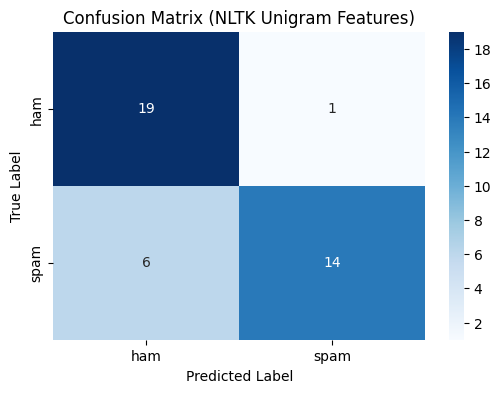

In [18]:
true_labels_unigram = []
predicted_labels_unigram = []

for features, label in testing_this_fold:
    true_labels_unigram.append(label)
    predicted_labels_unigram.append(classifier.classify(features))

# Convert labels to numerical format for confusion_matrix
label_map_nltk = {'ham': 0, 'spam': 1}
numerical_true_labels_unigram = [label_map_nltk[label] for label in true_labels_unigram]
numerical_predicted_labels_unigram = [label_map_nltk[label] for label in predicted_labels_unigram]


# Calculate the confusion matrix
cm_unigram = confusion_matrix(numerical_true_labels_unigram, numerical_predicted_labels_unigram)

# Plot the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm_unigram, annot=True, fmt='d', cmap='Blues', xticklabels=['ham', 'spam'], yticklabels=['ham', 'spam'])
plt.title('Confusion Matrix (NLTK Unigram Features)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# COMBINED

Performs 5-fold cross-validation to train and evaluate a Naive Bayes classifier
using the combined feature sets.
Calculates and prints the average precision, recall, and F1-score for the combined features.

In [19]:
# Train and evaluate with combined features
import collections
from nltk.classify import NaiveBayesClassifier
from nltk.classify.util import accuracy
from nltk.metrics.scores import precision, recall, f_measure
from sklearn.metrics import confusion_matrix
import numpy as np

# Define the number of folds for cross-validation
num_folds = 5
subset_size_combined = int(len(feature_sets_combined) / num_folds)

# Initialize lists to store evaluation metrics for combined features
all_precision_combined = []
all_recall_combined = []
all_f1_combined = []

for i in range(num_folds):
    print(f"  Processing fold {i+1}/{num_folds} (combined features)...")
    testing_this_fold_combined = feature_sets_combined[i * subset_size_combined:][:subset_size_combined]
    training_this_fold_combined = feature_sets_combined[:i * subset_size_combined] + feature_sets_combined[(i + 1) * subset_size_combined:]

    # Train the Naive Bayes classifier
    classifier_combined = NaiveBayesClassifier.train(training_this_fold_combined)

    # Evaluate the classifier
    # Get true and predicted labels
    true_labels_combined = collections.defaultdict(set)
    predicted_labels_combined = collections.defaultdict(set)


    for j, (features, label) in enumerate(testing_this_fold_combined):
        true_labels_combined[label].add(j)
        observed = classifier_combined.classify(features)
        predicted_labels_combined[observed].add(j)


    # Calculate and store metrics
    # Handle potential None values if a class is not predicted in a fold
    precision_score_combined = precision(true_labels_combined['spam'], predicted_labels_combined['spam']) if 'spam' in predicted_labels_combined else 0
    recall_score_combined = recall(true_labels_combined['spam'], predicted_labels_combined['spam']) if 'spam' in true_labels_combined else 0
    f1_score_combined = f_measure(true_labels_combined['spam'], predicted_labels_combined['spam']) if ('spam' in true_labels_combined or 'spam' in predicted_labels_combined) else 0


    all_precision_combined.append(precision_score_combined)
    all_recall_combined.append(recall_score_combined)
    all_f1_combined.append(f1_score_combined)


# Calculate average metrics across all folds for combined features
avg_precision_combined = sum(all_precision_combined) / num_folds if all_precision_combined else 0
avg_recall_combined = sum(all_recall_combined) / num_folds if all_recall_combined else 0
avg_f1_combined = sum(all_f1_combined) / num_folds if all_f1_combined else 0

print(f"\nAverage Precision (Combined Features): {avg_precision_combined:.4f}")
print(f"Average Recall (Combined Features): {avg_recall_combined:.4f}")
print(f"Average F1-score (Combined Features): {avg_f1_combined:.4f}")

  Processing fold 1/5 (combined features)...
  Processing fold 2/5 (combined features)...
  Processing fold 3/5 (combined features)...
  Processing fold 4/5 (combined features)...
  Processing fold 5/5 (combined features)...

Average Precision (Combined Features): 0.9157
Average Recall (Combined Features): 0.5433
Average F1-score (Combined Features): 0.6788


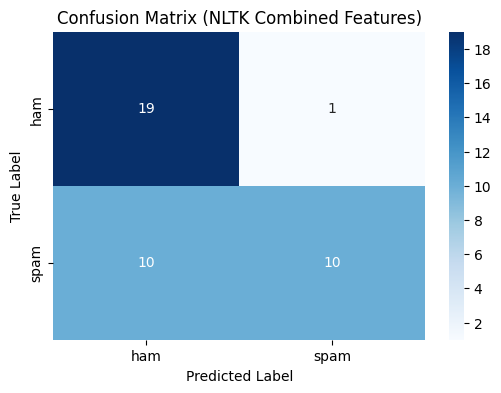

In [20]:
true_labels_combined_nltk = []
predicted_labels_combined_nltk = []

for features, label in testing_this_fold_combined:
    true_labels_combined_nltk.append(label)
    predicted_labels_combined_nltk.append(classifier_combined.classify(features))

# Convert labels to numerical format for confusion_matrix
label_map_nltk = {'ham': 0, 'spam': 1}
numerical_true_labels_combined_nltk = [label_map_nltk[label] for label in true_labels_combined_nltk]
numerical_predicted_labels_combined_nltk = [label_map_nltk[label] for label in predicted_labels_combined_nltk]

# Calculate the confusion matrix
cm_combined_nltk = confusion_matrix(numerical_true_labels_combined_nltk, numerical_predicted_labels_combined_nltk)

# Plot the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm_combined_nltk, annot=True, fmt='d', cmap='Blues', xticklabels=['ham', 'spam'], yticklabels=['ham', 'spam'])
plt.title('Confusion Matrix (NLTK Combined Features)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

Choose an additional advanced feature: Sci Kit Learn classifiers

In [21]:
!pip install matplotlib==3.7.1 seaborn==0.13.1 wordcloud==1.9.2 scikit-learn==1.3.2

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.9/10.9 MB 68.8 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.6.1
    Uninstalling scikit-learn-1.6.1:
      Successfully uninstalled scikit-learn-1.6.1


Step 1: Convert NLTK feature sets to scikit-learn format

In [22]:
from sklearn.feature_extraction import DictVectorizer
from sklearn.model_selection import train_test_split

# Separate features and labels
features, labels = zip(*feature_sets_combined)

# Convert feature dictionaries to a feature matrix
vectorizer = DictVectorizer()
feature_matrix = vectorizer.fit_transform(features)

# Convert labels to a numerical format
label_map = {'ham': 0, 'spam': 1}
numerical_labels = [label_map[label] for label in labels]

In [23]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(feature_matrix, numerical_labels, test_size=0.2, random_state=42)

# Sci Kit Learn
## Multinomial Naive Bayes classifier
Combined Feature set

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  ):
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  ):



Scikit-learn Classifier Evaluation:
Accuracy: 0.8500
Precision: 0.8333
Recall: 0.8333
F1-score: 0.8333


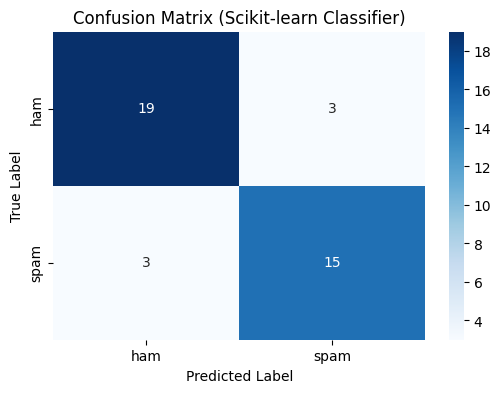

In [24]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Train a Multinomial Naive Bayes classifier
clf = MultinomialNB()
clf.fit(X_train, y_train)

# Predict on the test set
y_pred = clf.predict(X_test)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print(f"\nScikit-learn Classifier Evaluation:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

# Plot Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['ham', 'spam'], yticklabels=['ham', 'spam'])
plt.title('Confusion Matrix (Scikit-learn Classifier)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()